In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# Character-level language modeling 

- each character of every name is trated as an example
- predict the next sequence of character

**plan:**
- start with characters
- then words
- then images

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
print("Total number of words: ", len(words))
print("Shortest word length: ", min(len(word) for word in words))
print("Longest word length: ", max(len(word) for word in words))

Total number of words:  32033
Shortest word length:  2
Longest word length:  15


## Bigram Langauge Model - two characters at a time
- Given a character, predict the next character

lets create bigrams of the usernames

In [5]:
for word in words[:2]:
    print("for the word: ", word)
    for char1, char2 in zip(word, word[1:]):
        print(char1, char2)

for the word:  emma
e m
m m
m a
for the word:  olivia
o l
l i
i v
v i
i a


lets take example of the first word, __'emma'__, 

the word starts with __'e'__ and ends with __'a'__ but the above bigrams don't capture that information, so lets add that information

In [6]:
#BOS - beginning of sentence or word in this case
#EOS - end of sentence or word in this case

for word in words[:1]:
    print("for the word: ", word)
    chars = ['<BOS>'] + list(word) + ['<EOS>']
    for char1, char2 in zip(chars, chars[1:]):
        print(char1, char2)

for the word:  emma
<BOS> e
e m
m m
m a
a <EOS>


Counting is the simplest way to determine which characters are likerly to follow other characters in Bigram Models

- How often do the bigram combinations occur?

In [10]:
freq = {}

for word in words:
    chars = ['<BOS>'] + list(word) + ['<EOS>']
    for char1, char2 in zip(chars, chars[1:]):
        bigram = (char1, char2)
        freq[bigram] = freq.get(bigram, 0) + 1

which bigrams are most frequent in our dataset?

In [11]:
sorted(freq.items(), key = lambda key_value: -key_value[1])[:5]

[(('n', '<EOS>'), 6763),
 (('a', '<EOS>'), 6640),
 (('a', 'n'), 5438),
 (('<BOS>', 'a'), 4410),
 (('e', '<EOS>'), 3983)]

wouldn't it be better to see the frequencies in a table-like format? 

2D arrays can help OR tensors(for efficient handling)

how many rows and columns should the have?

26 chars of the English language, BOS and EOS => 28 rows and 28 columns

In [16]:
counts = torch.zeros((28, 28), dtype= torch.int32)

the tensor 'counts' needs int values but we have char literals to lets create a lookup table to map them to an int value

In [37]:
chars = list('abcdefghijklmnopqrstuvwxyz')
# stoi_lookups - from string to int
stoi_lookups = {c: i for i, c in enumerate(chars)}
stoi_lookups['<BOS>'] = 26
stoi_lookups['<EOS>'] = 27

In [38]:
for word in words:
    chars = ['<BOS>'] + list(word) + ['<EOS>']
    for char1, char2 in zip(chars, chars[1:]):
        i_char1, i_char2 = stoi_lookups[char1], stoi_lookups[char2]
        counts[i_char1, i_char2] += 1


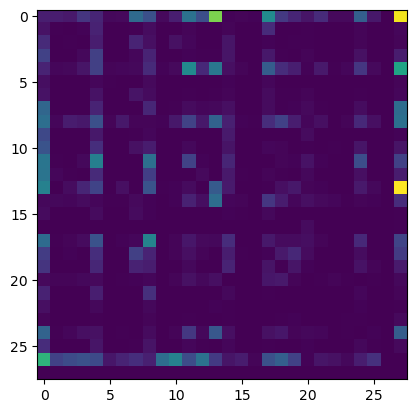

In [52]:
plt.imshow(counts)

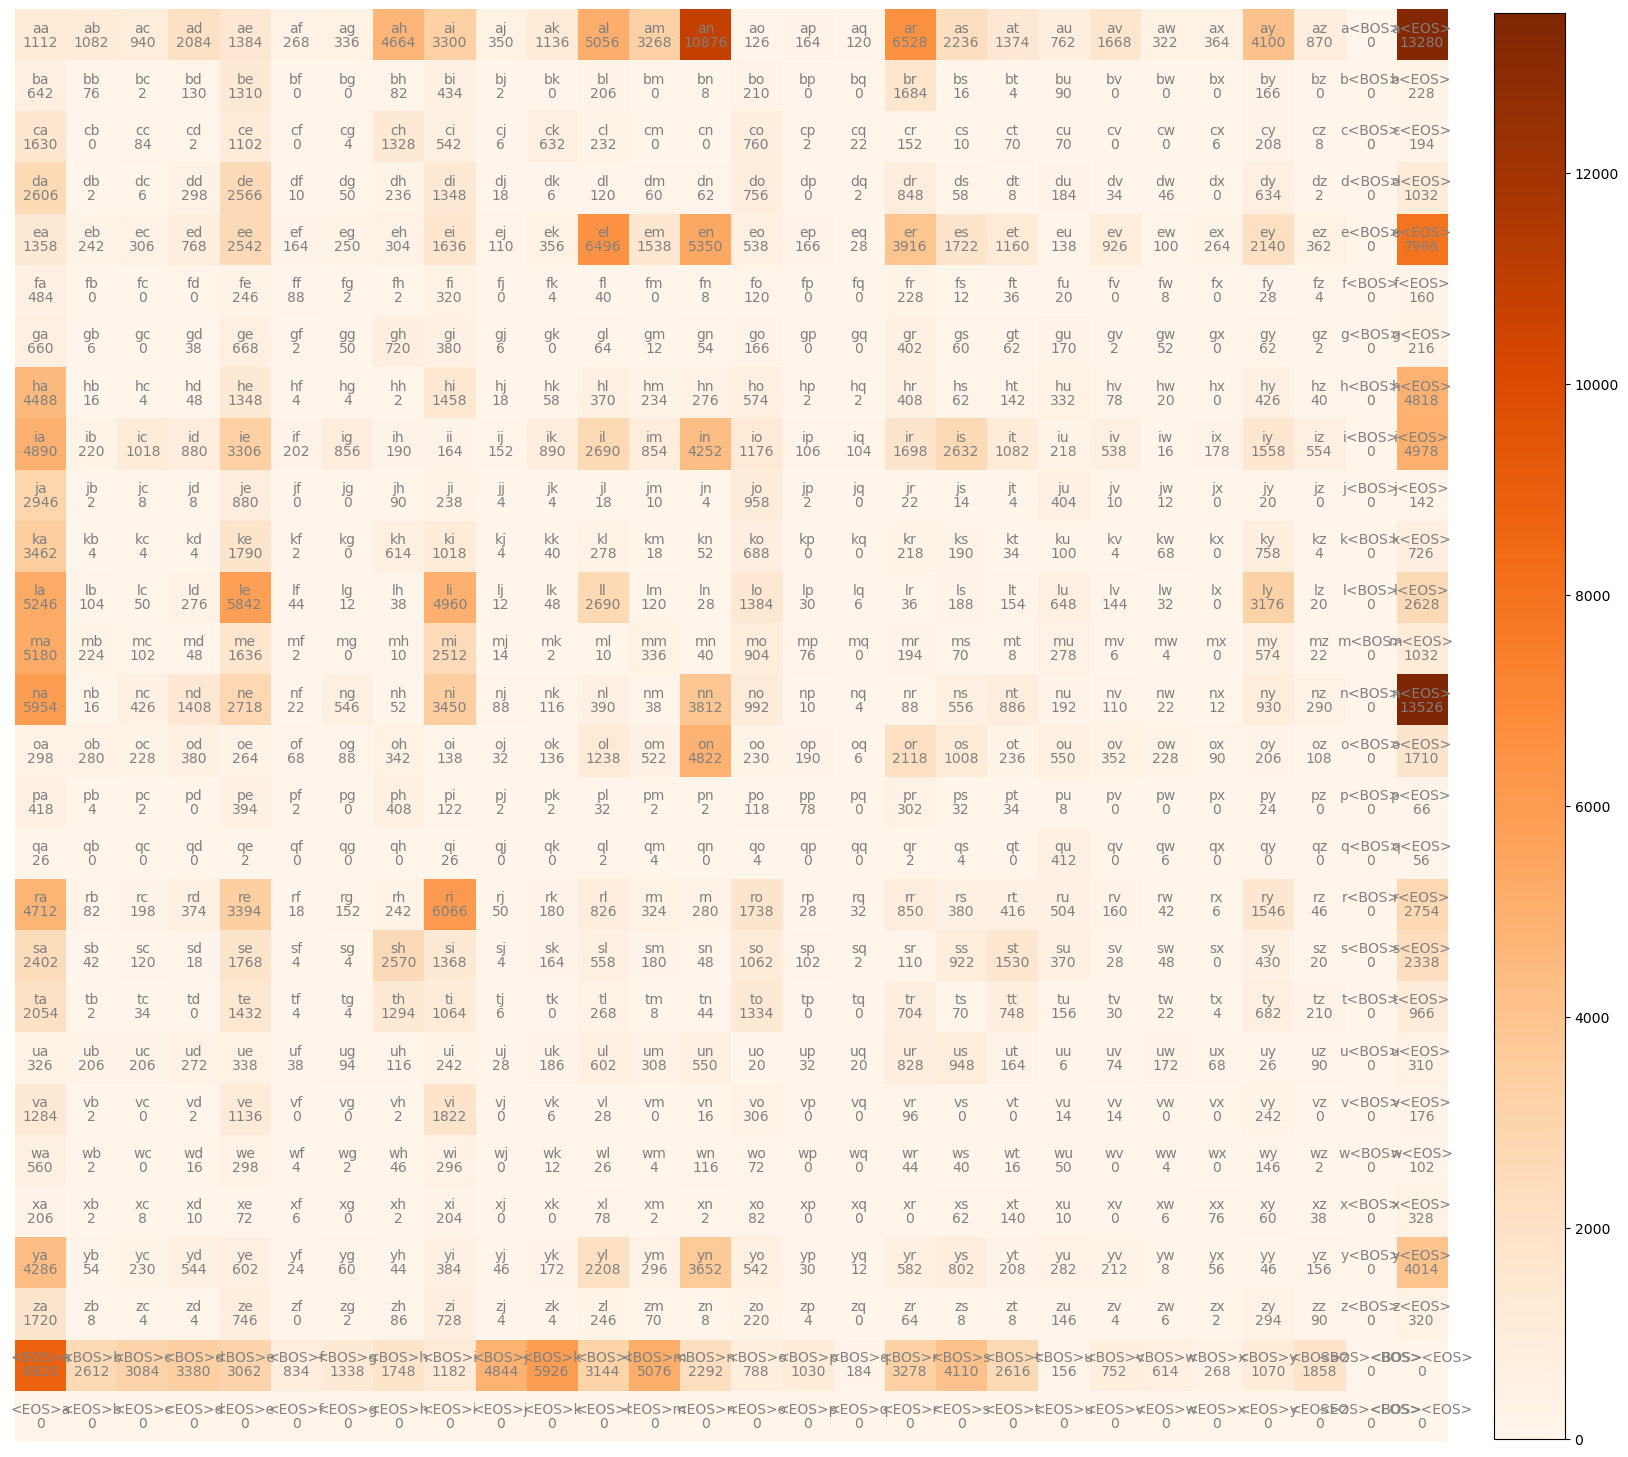

In [95]:
# itos_lookups - int to string
itos_lookups = {i: char for char, i in stoi_lookups.items()}

fig, ax = plt.subplots(figsize=(20, 20))
iax = plt.imshow(counts, cmap='Oranges')

for i in range(len(stoi_lookups)):
    for j in range(len(stoi_lookups)):
        biggram_str = itos_lookups[i] + itos_lookups[j]
        biagram_freq = counts[i, j].item()
        ax.text(j, i, biggram_str, ha='center', va='bottom', color='gray')
        ax.text(j, i, biagram_freq, ha='center', va='top', color='gray')

plt.axis('off')
fig.colorbar(iax, fraction=0.046, pad=0.03)

plt.show()


 __Reference: [Neural Networks: Zero to Hero by **Anderj Karpathy**](https://youtu.be/VMj-3S1tku0?si=nt0sYb9Rs2g4qApr)__